In [1]:
# Analysis of KPOINTS convergence scan

In [2]:
import pymatgen as mg
from pymatgen.io.vasp.outputs import * 
import matplotlib.pyplot as plt
import os
import glob


In [12]:
# Loop through subdirs and extract data: 
# glob is a usefull tool that allows for linux wildcard searches
# we will search for the vasprun file in each subdir and create a list...
mylist = glob.glob('run_*/vasprun.xml')
mylist

['run_3/vasprun.xml',
 'run_15/vasprun.xml',
 'run_9/vasprun.xml',
 'run_6/vasprun.xml',
 'run_18/vasprun.xml',
 'run_12/vasprun.xml']

In [47]:
# We will then loop through the list, pulling the important data we need from each run in the list: 
data = []  

for i in mylist: 
    vr = Vasprun(i)
    eng = vr.final_energy
    kpts = vr.kpoints.kpts[0][0]
    data.append([kpts,eng])
data

[[3, -20.55419818],
 [15, -20.84053612],
 [9, -20.83965008],
 [6, -20.84431262],
 [18, -20.83973378],
 [12, -20.83985401]]

In [48]:
data.sort(key=lambda x:x[0])
data

[[3, -20.55419818],
 [6, -20.84431262],
 [9, -20.83965008],
 [12, -20.83985401],
 [15, -20.84053612],
 [18, -20.83973378]]

In [52]:
data = np.array(data)
print(data)
kpts = data[:,0]
E0 = data[:,1]

[[  3.         -20.55419818]
 [  6.         -20.84431262]
 [  9.         -20.83965008]
 [ 12.         -20.83985401]
 [ 15.         -20.84053612]
 [ 18.         -20.83973378]]


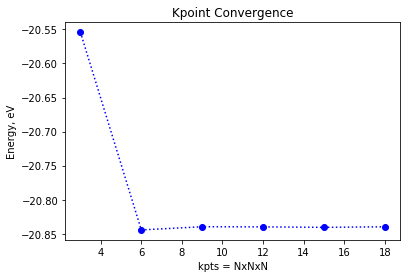

In [58]:
# Plot Results
plt.plot(kpts,E0,':b',marker='o')
plt.xlabel('kpts = NxNxN')
plt.ylabel('Energy, eV')
plt.title('Kpoint Convergence')
plt.show() 

In [57]:
# So an good k-point mesh would be 6x6x6